In [1]:

%load_ext autoreload
%autoreload 2

from roi import make_roi

/Users/simon/.virtualenvs/molnet/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/Users/simon/.virtualenvs/molnet/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/Users/simon/.virtualenvs/molnet/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/Users/simon/.virtualenvs/molnet/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/Users/simon/.virtualenvs/molnet/lib/python2.7/site-packages/scipy/interpolate/_bspline

Call the ROI finder. This is based upon XCMS ROI finding.

Notes

- it doesn't do any centwave, just finds ROI
- it should be easy to adapt this to real time

In [141]:
good_roi,junk = make_roi('Beer_multibeers_1_fullscan1.mzML',mz_tol = 0.01,min_length = 10,min_intensity = 1e6,start_rt = 200,stop_rt = 1200)

Scan @ 200.046, 17 live ROIs
Scan @ 201.312, 17 live ROIs
Scan @ 202.76, 17 live ROIs
Scan @ 204.018, 20 live ROIs
Scan @ 205.268, 24 live ROIs
Scan @ 206.557, 25 live ROIs
Scan @ 207.8, 24 live ROIs
Scan @ 209.04, 35 live ROIs
Scan @ 210.28, 35 live ROIs
Scan @ 211.521, 39 live ROIs
Scan @ 212.928, 45 live ROIs
Scan @ 214.168, 36 live ROIs
Scan @ 215.408, 32 live ROIs
Scan @ 216.687, 32 live ROIs
Scan @ 217.928, 30 live ROIs
Scan @ 219.171, 29 live ROIs
Scan @ 220.414, 32 live ROIs
Scan @ 221.879, 31 live ROIs
Scan @ 223.123, 33 live ROIs
Scan @ 224.366, 37 live ROIs
Scan @ 225.612, 37 live ROIs
Scan @ 227.04, 32 live ROIs
Scan @ 228.285, 31 live ROIs
Scan @ 229.531, 25 live ROIs
Scan @ 230.778, 27 live ROIs
Scan @ 232.248, 29 live ROIs
Scan @ 233.495, 31 live ROIs
Scan @ 234.741, 32 live ROIs
Scan @ 235.986, 37 live ROIs
Scan @ 237.597, 36 live ROIs
Scan @ 238.842, 36 live ROIs
Scan @ 240.086, 42 live ROIs
Scan @ 241.329, 44 live ROIs
Scan @ 242.932, 46 live ROIs
Scan @ 244.174, 42 l

Scan @ 636.273, 54 live ROIs
Scan @ 637.511, 46 live ROIs
Scan @ 638.748, 42 live ROIs
Scan @ 639.987, 39 live ROIs
Scan @ 641.225, 32 live ROIs
Scan @ 642.496, 30 live ROIs
Scan @ 643.734, 28 live ROIs
Scan @ 644.972, 29 live ROIs
Scan @ 646.209, 27 live ROIs
Scan @ 647.446, 28 live ROIs
Scan @ 648.682, 27 live ROIs
Scan @ 649.919, 26 live ROIs
Scan @ 651.155, 24 live ROIs
Scan @ 652.427, 23 live ROIs
Scan @ 653.663, 23 live ROIs
Scan @ 654.899, 23 live ROIs
Scan @ 656.136, 22 live ROIs
Scan @ 657.372, 23 live ROIs
Scan @ 658.608, 22 live ROIs
Scan @ 659.843, 23 live ROIs
Scan @ 661.079, 19 live ROIs
Scan @ 662.349, 27 live ROIs
Scan @ 663.587, 26 live ROIs
Scan @ 664.823, 29 live ROIs
Scan @ 666.059, 40 live ROIs
Scan @ 667.297, 60 live ROIs
Scan @ 668.534, 68 live ROIs
Scan @ 669.77, 76 live ROIs
Scan @ 671.008, 65 live ROIs
Scan @ 672.311, 63 live ROIs
Scan @ 673.549, 64 live ROIs
Scan @ 674.786, 64 live ROIs
Scan @ 676.022, 66 live ROIs
Scan @ 677.261, 67 live ROIs
Scan @ 678.498,

`good_roi` are regions that pass the miminimum length threshold

`junk` are the rest.

In [142]:
print len(good_roi),len(junk)

783 2788


Sort the ROI by retention time

In [143]:
good_roi.sort(key = lambda x: x.rt_list[0])

Compute the correlation between all roi pairs. If the correlation is above a threshold, store the m/z shift

In [144]:
from roi import roi_correlation
shifts = []
for i,roi1 in enumerate(good_roi):
    if i%100 == 0:
        print i
    for roi2 in good_roi[i:]:
        if not roi1 == roi2:
            corr = roi_correlation(roi1,roi2,method = 'cosine')
            if corr > 0.95:
                shifts.append(abs(roi1.get_mean_mz()-roi2.get_mean_mz()))

0
100
200
300
400
500
600
700


Interesting to compare the density of shifts with that produced by randomly pickling pairs of ROIs. We would expect some shifts to appear more often in real pairs than random ones

In [145]:
# baseline shift density
import numpy as np
baseline_shifts = []
for i in range(len(shifts)):
    rand1 = np.random.choice(good_roi)
    rand2 = rand1
    while(rand2 == rand1):
        rand2 = np.random.choice(good_roi)
    baseline_shifts.append(abs(rand1.get_mean_mz() - rand2.get_mean_mz()))

Histogram the two sets of shifts - red = real

(0, 200)

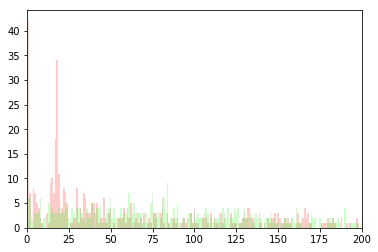

In [146]:
bins = np.arange(-0.5,500,1)
a = plt.hist(shifts,bins,color=[1,0,0,0.2])
b = plt.hist(baseline_shifts,bins,color=[0,1,0,0.2])
plt.xlim(0,200)

Seems like random shifts are never seen more than 50 times, but some real ones much more often

What are some common shifts? Print the 10 most common ones.

Note:

- Bins start at 0.5 and are width 1.

In [147]:
import collections
bins_counts_dict = collections.OrderedDict()
bins_counts = zip(a[1],a[0])
bins_counts.sort(key = lambda x: x[1],reverse = True)
for b,c in bins_counts[:10]:
    print b,b+1,'\t',c

for b,c in bins_counts:
    bins_counts_dict[b] = c

0.5 1.5 	42.0
17.5 18.5 	34.0
16.5 17.5 	18.0
18.5 19.5 	11.0
14.5 15.5 	10.0
13.5 14.5 	9.0
3.5 4.5 	8.0
21.5 22.5 	8.0
29.5 30.5 	8.0
1.5 2.5 	7.0


Which shifts can be mapped to possible *differences* between adducts?

The following computes and stores all shifts between different adduct peaks

In [148]:
from roi import POS_TRANSFORMATIONS
tr = POS_TRANSFORMATIONS.keys()
trans = []
for i,k in enumerate(tr[:-1]):
    for k2 in tr[i+1:]:
        trans.append((k,k2,abs(POS_TRANSFORMATIONS[k](123) - POS_TRANSFORMATIONS[k2](123))))

Map the common shifts to the possible adduct shifts. Note that we would see more hits at the top. I.e. real shifts should be more likely to be real!

In [149]:
bct = collections.OrderedDict()
for b,c in bins_counts:
    bin_min = b
    bin_max = b+1
    bct[b] = []
    for k1,k2,t in trans:
        if t > bin_min and t < bin_max:
            bct[b].append((b,c,k1,k2,t))

for b in bct.keys():
    print b,b+1,bins_counts_dict[b],", ".join(["{} <-> {} ({:.2f})".format(a[2],a[3],a[4]) for a in bct[b]])

0.5 1.5 42.0 
17.5 18.5 34.0 
16.5 17.5 18.0 M+H <-> [M+NH3]+H (17.03), 2M+H <-> 2M+NH4 (17.03)
18.5 19.5 11.0 [M+ACN]+H <-> M+Na (19.04), M+2Na-H <-> M+ACN+Na (19.04), M+ACN+Na <-> [M+2ACN]+H (19.04)
14.5 15.5 10.0 [M+CH3OH]+H <-> [M+NH3]+H (15.00), M+ACN+Na <-> [M+DMSO]+H (15.01)
13.5 14.5 9.0 
3.5 4.5 8.0 [M+DMSO]+H <-> [M+2ACN]+H (4.04)
21.5 22.5 8.0 M+H <-> M+Na (21.98), [M+ACN]+H <-> M+ACN+Na (21.98), M+Na <-> M+2Na-H (21.98)
29.5 30.5 8.0 
1.5 2.5 7.0 M+2K+H <-> [M+DMSO]+H (2.10)
4.5 5.5 7.0 [M+NH3]+H <-> M+Na (4.96)
15.5 16.5 7.0 M+Na <-> M+K (15.97)
22.5 23.5 7.0 
33.5 34.5 7.0 M+2Na-H <-> [M+DMSO]+H (34.05)
34.5 35.5 6.0 [M+ACN]+H <-> M+2K+H (34.89)
45.5 46.5 6.0 [M+CH3OH]+H <-> [M+DMSO]+H (45.99), [M+NH3]+H <-> M+ACN+Na (45.98)
80.5 81.5 6.0 
5.5 6.5 5.0 [M+CH3OH]+H <-> M+K (5.93), M+K <-> M+2Na-H (6.01), M+2K+H <-> [M+2ACN]+H (6.14)
23.5 24.5 5.0 [M+ACN]+H <-> [M+NH3]+H (24.00)
38.5 39.5 5.0 
39.5 40.5 5.0 M+K <-> [M+DMSO]+H (40.06)
41.5 42.5 5.0 
61.5 62.5 5.0 [M+DMSO]+H <

Q:

1. 17.5 to 18.5 seems very high, but hard to explain?
2. 0.2 to 1.5 is isotopes
3. 1.5 to 2.5 is probably also isotope

In [150]:
from roi import greedy_roi_cluster
roi_clusters = greedy_roi_cluster(good_roi)

9


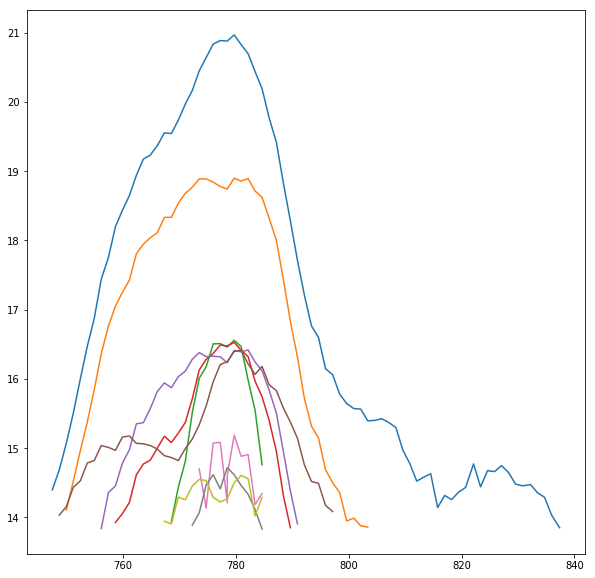

In [175]:
plt.figure(figsize=(10,10))
clust_idx = 3
for r in roi_clusters[clust_idx]:
    plt.plot(r.rt_list,np.log(r.intensity_list))
# plt.ylim([0,0.2e9])
print len(roi_clusters[clust_idx])

In [110]:
?plt.hist


(800, 900)

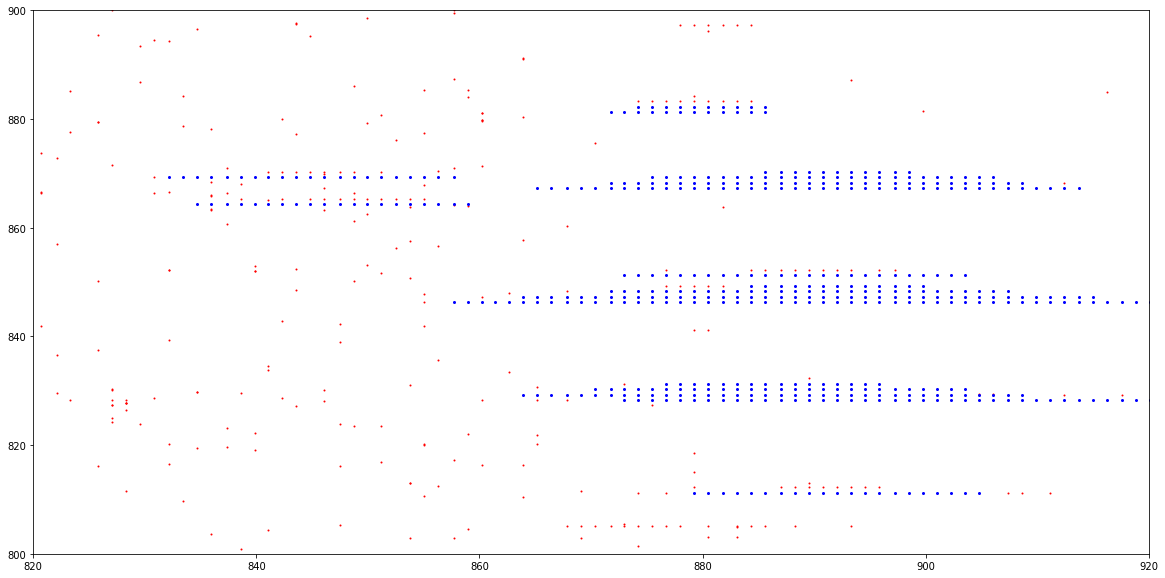

In [97]:
plt.figure(figsize = (20,10))
x = []
y = []
for roi in junk:
    y += roi.mz_list
    x += roi.rt_list
plt.plot(x,y,'ro',markersize=1)

x = []
y = []
for roi in dead:
    y += roi.mz_list
    x += roi.rt_list
plt.plot(x,y,'bo',markersize=2)

# plt.xlim([800,1000])
# plt.ylim([846,849])
plt.xlim([820,920])
plt.ylim([800,900])

In [86]:
PROTON_MASS = 1.00727645199076
for i,l in enumerate(live[:500]):
    dif = live[i+1].get_mean_mz() - live[i].get_mean_mz()
    if abs(dif-PROTON_MASS) < 0.01:
        print dif
    

1.00332770714
1.00325934092
1.00486680823
1.00107095408
1.00350247897
1.00900946723
1.00378417969
1.00330054242
1.00356395825
1.00166790302


IndexError: list index out of range